In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features + tfidf(ngram=(1,1))

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_test.shape

(193, 263)

========================= DecisionTree =========================
Elapsed Time: 4.536 seconds
DecisionTreeClassifier(max_depth=20, min_samples_split=16)
Train Accuracy: 0.7418, F1: [0.8084 0.7561 0.7016 0.7115]
Test  Accuracy: 0.4767, F1: [0.5405 0.48   0.4833 0.375 ]


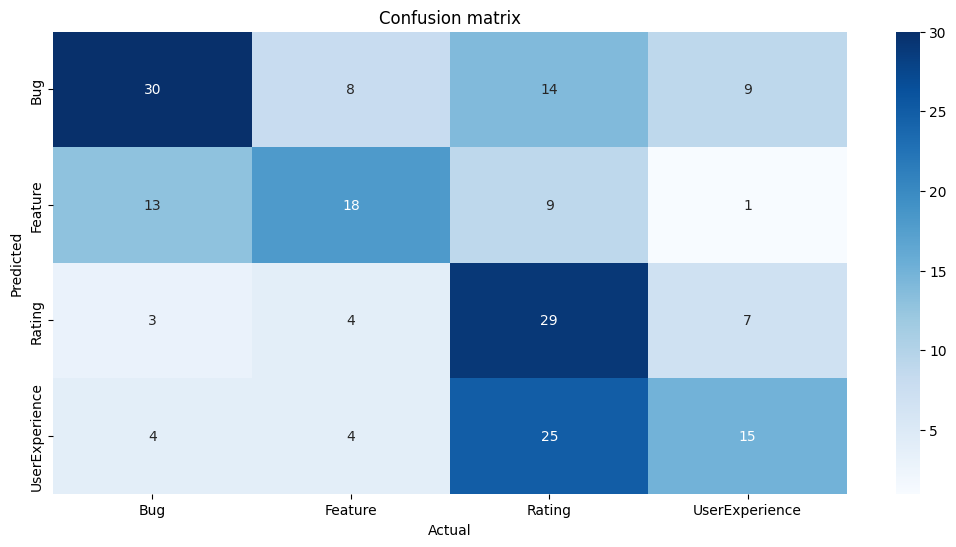

========================= LSVM =========================
Elapsed Time: 2.7405 seconds
LinearSVC(C=1, dual=False)
Train Accuracy: 0.8196, F1: [0.8358 0.7551 0.8322 0.8406]
Test  Accuracy: 0.6114, F1: [0.7049 0.5405 0.5941 0.5618]


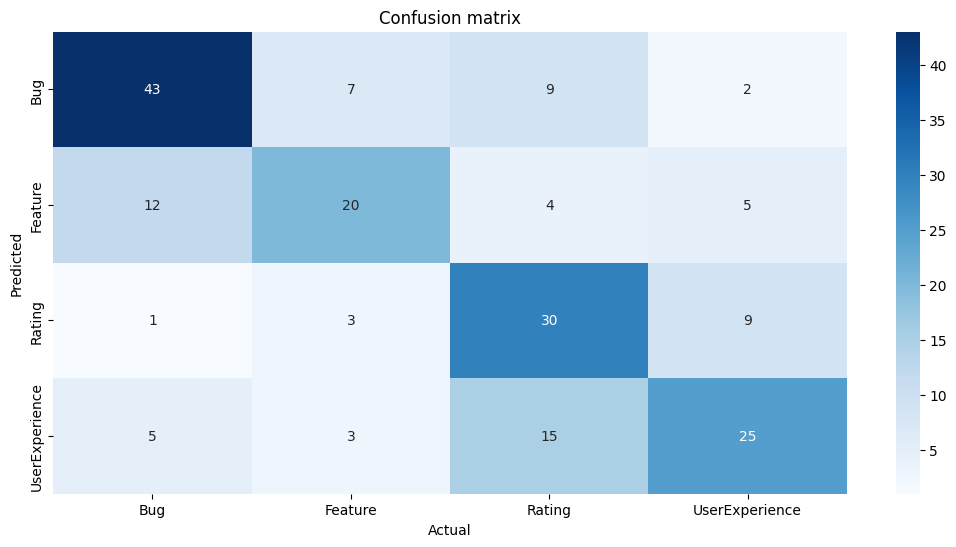

========================= RandomForest =========================
Elapsed Time: 48.9868 seconds
RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=800)
Train Accuracy: 0.8233, F1: [0.881  0.8393 0.7758 0.8054]
Test  Accuracy: 0.5699, F1: [0.6769 0.3939 0.5472 0.5714]


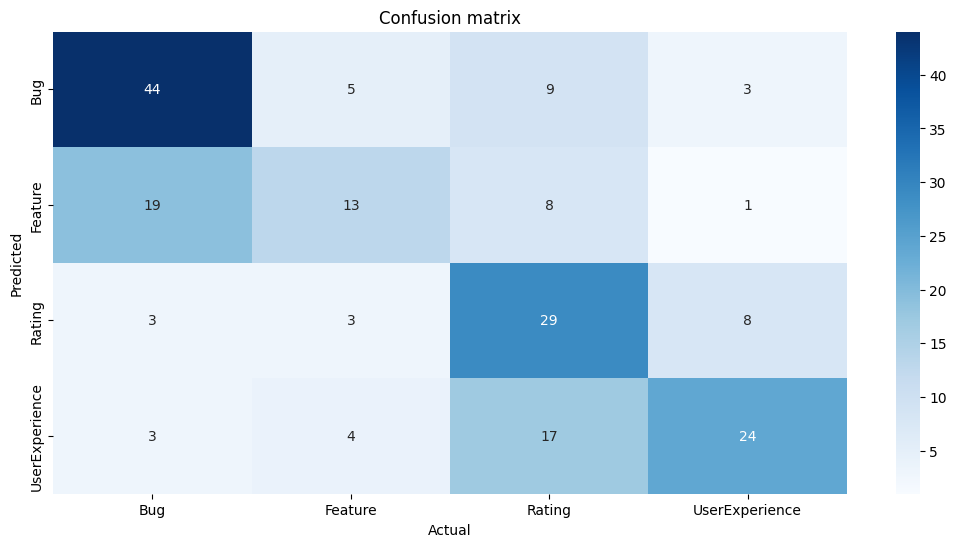

========================= AdaBoost =========================
Elapsed Time: 1.581 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=100, dual=False),
                   learning_rate=0.01)
Train Accuracy: 0.7756, F1: [0.7863 0.6885 0.8068 0.7979]
Test  Accuracy: 0.5907, F1: [0.6667 0.5135 0.5859 0.5517]


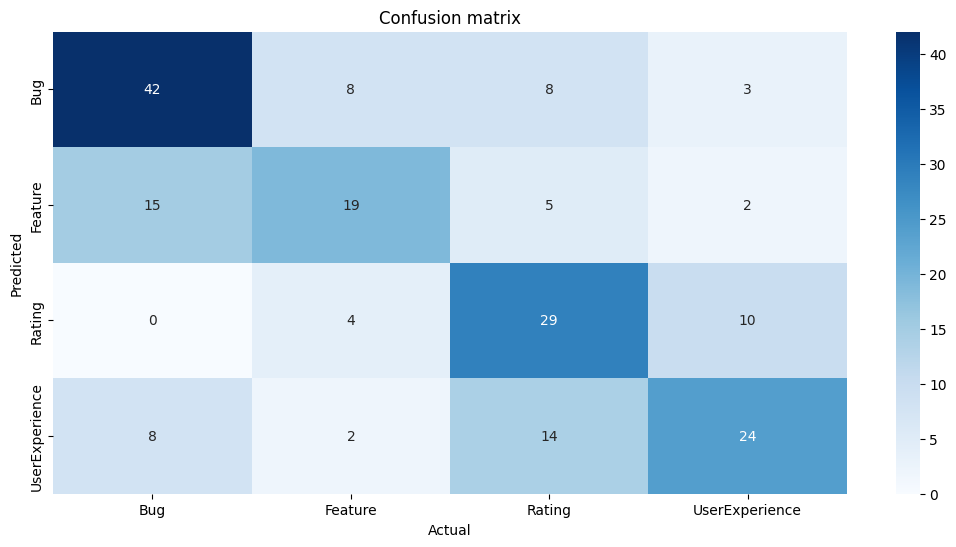

========================= XGBoost =========================
Elapsed Time: 70.0907 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8886088519084324, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.023986033671428042, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2689010402690304, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=137, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.8608, F1: [0.8946 0.8756 0.8388 0.8375]
Test  Accuracy: 0.6373, F1: [0.7317 0.5479 0.6214 0.5977]


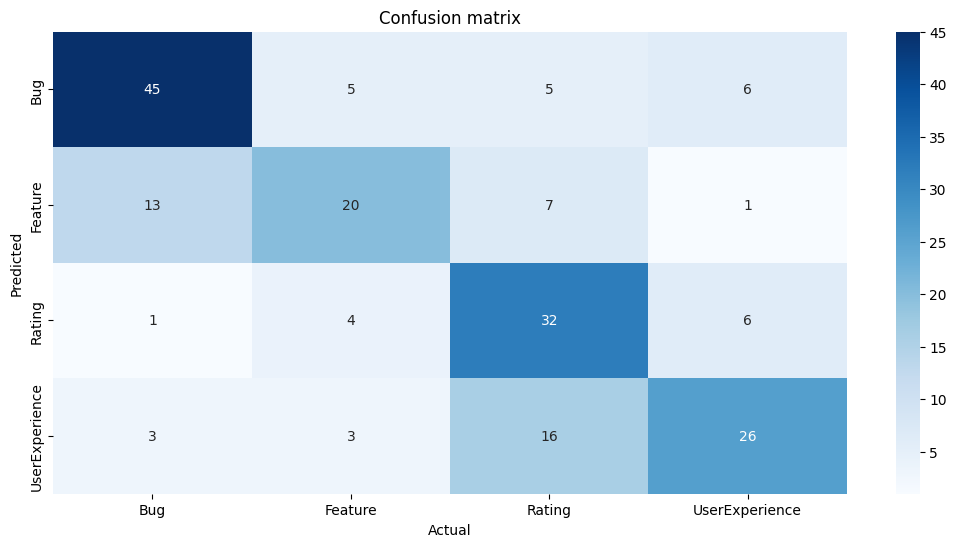

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)